In [2]:
import os
import PyPDF2
import fitz
import pandas as pd

In [3]:
from nltk import tokenize
# import nltk
# nltk.download('punkt')

In [4]:
dir = 'annoted_sustainability_reports/Consumer_Discretionary/'


In [77]:
# aggregated sentences per report
highlighted_num = []
highlighted_sentences = [] 
all_sentences = []
highlighted_label = []
all_label = []

# aggregated sentences of the entire industry (tokenizing highlighted_result & all_result)
rel_text = []
rel_label = []
all_text_final = []


x_label = ["McDonalds", "TJX", "HomeDepot", "Lowes", "Target", "BookingHoldings", "Tesla",
     "Amazon", "Nike", "Starbucks"]


for file in os.listdir(dir): # running all the files in the industry folder
    f = os.path.join(dir, file) # joining filename and directory
    print(f)
    
    # labelling sentences by companies 
    res = list(filter(lambda x:  x in f, x_label))

    doc = fitz.open(f) # opening each company report
    print(doc)
    
    # results of each report
    highlighted_result = []
    all_result = [] 
    
    # Iterate each page of the document 
    for page in doc:
        
        # extract all the sentences in pdf 
        test = page.get_text()
        all_result.append(test)
        
        # extracting highlighted sentences from pdf 
        highlights = []
        annot = page.first_annot
        
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next
        
        # calculate coordinate sum to eliminate duplicated sentences 
        coordinate_sum_total = []
        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                num_i = 0
                for w in all_words:
                    if (fitz.Rect(w[0:4]).intersects(h)):
                        if str(sum(w[0:4])) not in coordinate_sum_total: #if no duplicate coordinate sum found, append
                            coordinate_sum_total.append(str(sum(w[0:4])))
                            sentence.append(w[4])
            
                highlight_text.append(" ".join(sentence))
        
#         print(highlight_text)
        
        if len(highlight_text) > 0:
            highlighted_result.append(" ".join(highlight_text))
        
#         print(result)

    # Results of the entire industry & keeps track of number of sentences in highlighted_num
    highlighted_num.append(len(highlighted_result))
    highlighted_sentences.append(highlighted_result)
    all_sentences.append(all_result)
    
    print(len(highlighted_result))
    
#         print(test_text)
        
    for r in highlighted_result:
        if r is not None:
            # tokenize sentences by pages where the sentences is found 
            # instead of conducting it to the entire report this enhances accuracy 
            rel_text += tokenize.sent_tokenize(r)
            highlighted_label.append(res)
            rel_label += res * len(tokenize.sent_tokenize(r))         
    
    for i in all_result:
        all_text_final += tokenize.sent_tokenize(i.replace("\n", " "))
        all_label += res * len(tokenize.sent_tokenize(i.replace("\n", " ")))
        
#     print(highlighted_sentences, "\n", len(highlighted_sentences))


annoted_sustainability_reports/Consumer_Discretionary/McDonalds_2021_Climate_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/McDonalds_2021_Climate_report.pdf')
2
annoted_sustainability_reports/Consumer_Discretionary/TJX_2021_Sustainability_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/TJX_2021_Sustainability_report.pdf')
7
annoted_sustainability_reports/Consumer_Discretionary/HomeDepot_2021_ESG_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/HomeDepot_2021_ESG_report.pdf')
NoneType found
11
annoted_sustainability_reports/Consumer_Discretionary/Lowes_2021_CSR_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/Lowes_2021_CSR_report.pdf')
1
annoted_sustainability_reports/Consumer_Discretionary/Target_2021_Corporate_Responsibility_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/Target_2021_Corporate_Responsibility_report.pdf')
5
annoted_sustainability_repor

### Extracting Sentences

In [72]:
# aggregated sentences per report
highlighted_num = []
highlighted_sentences = [] 
all_sentences = []
highlighted_label = []
all_label = []

# aggregated sentences of the entire industry (tokenizing highlighted_result & all_result)
rel_text = []
rel_label = []
all_text_final = []


x_label = ["McDonalds", "TJX", "HomeDepot", "Lowes", "Target", "BookingHoldings", "Tesla",
     "Amazon", "Nike", "Starbucks"]


for file in os.listdir(dir): # running all the files in the industry folder
    f = os.path.join(dir, file) # joining filename and directory
    print(f)
    
    # labelling sentences by companies 
    res = list(filter(lambda x:  x in f, x_label))

    doc = fitz.open(f) # opening each company report
    print(doc)
    
    # results of each report
    highlighted_result = []
    all_result = [] 
    
    # Iterate each page of the document 
    for page in doc:
        
        # extract all the sentences in pdf 
        test = page.get_text()
        
        all_result.append(test)
        
        # extracting highlighted sentences from pdf 
        highlights = []
        annot = page.first_annot
        
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next
        
        # calculate coordinate sum to eliminate duplicated sentences 
        coordinate_sum_total = []
        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                num_i = 0
                for w in all_words:
                    if (fitz.Rect(w[0:4]).intersects(h)):
                        if str(sum(w[0:4])) not in coordinate_sum_total: #if no duplicate coordinate sum found, append
                            coordinate_sum_total.append(str(sum(w[0:4])))
                            sentence.append(w[4])
            
                highlight_text.append(" ".join(sentence))
        
#         print(highlight_text)
        
        if len(highlight_text) > 0:
            highlighted_result.append(" ".join(highlight_text))
        
#         print(result)

    # Results of the entire industry & keeps track of number of sentences in highlighted_num
    highlighted_num.append(len(highlighted_result))
    highlighted_sentences.append(highlighted_result)
    all_sentences.append(all_result)
    
    print(len(highlighted_result))
    
#         print(test_text)
        
    for r in highlighted_result:
        if r is not None:
            # tokenize sentences by pages where the sentences is found 
            # instead of conducting it to the entire report this enhances accuracy 
            rel_text += tokenize.sent_tokenize(r)
            highlighted_label.append(res)
            rel_label += res * len(tokenize.sent_tokenize(r))         
    
    for i in all_result:
        all_text_final += tokenize.sent_tokenize(i.replace("\n", " "))
        all_label += res * len(tokenize.sent_tokenize(i.replace("\n", " ")))
        
#     print(highlighted_sentences, "\n", len(highlighted_sentences))



annoted_sustainability_reports/Consumer_Discretionary/McDonalds_2021_Climate_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/McDonalds_2021_Climate_report.pdf')
2
annoted_sustainability_reports/Consumer_Discretionary/TJX_2021_Sustainability_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/TJX_2021_Sustainability_report.pdf')
7
annoted_sustainability_reports/Consumer_Discretionary/HomeDepot_2021_ESG_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/HomeDepot_2021_ESG_report.pdf')
NoneType found
11
annoted_sustainability_reports/Consumer_Discretionary/Lowes_2021_CSR_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/Lowes_2021_CSR_report.pdf')
1
annoted_sustainability_reports/Consumer_Discretionary/Target_2021_Corporate_Responsibility_report.pdf
Document('annoted_sustainability_reports/Consumer_Discretionary/Target_2021_Corporate_Responsibility_report.pdf')
5
annoted_sustainability_repor

In [46]:
highlighted_num

[2, 7, 11, 1, 5, 2, 1, 7, 7, 3]

In [47]:
rel_text_df = pd.DataFrame([rel_text, rel_label]).transpose()
rel_text_df = rel_text_df.rename(columns = {0: 'relevant_sentences', 1: 'company_label'})
rel_text_df

,relevant_sentences,company_label
0,We pledged to put McDonald’s on the path to ne...,McDonalds
1,"By 2030, we aim to partner with Franchisees to...",McDonalds
2,"By 2030, we aim to reduce emissions intensity ...",McDonalds
3,Once all 2019–2021 transacted U.S. renewable e...,McDonalds
4,Our global approach to reducing our climate im...,TJX
...,...,...
114,0.5M metric tons of GHG emissions reduced thro...,Nike
115,2030 Planet Goals Carbon 50% absolute reductio...,Starbucks
116,With performance-based standards that incorpor...,Starbucks
117,"Worldwide, Starbucks purchases enough renewabl...",Starbucks


In [38]:
for i in rel_text_df.relevant_sentences:
    print(i)
    print()

We pledged to put McDonald’s on the path to net zero emissions by 2050,

By 2030, we aim to partner with Franchisees to reduce GHG emissions related to McDonald’s restaurants and offices by 36% from a 2015 base year.

By 2030, we aim to reduce emissions intensity (per metric ton of food and packaging) by 31% across our supply chain from the 2015 baseline.

Once all 2019–2021 transacted U.S. renewable energy projects are online, the energy generated is expected to be equivalent to over 8,000 U.S. restaurants’ worth of electricity and contribute to a 22% reduction from the 2015 baseline.

Our global approach to reducing our climate impact includes a balanced CLIMATE AND ENERGY: portfolio of emissions-reduction activities focused on reducing our energy consumption and expense, investing in energy efficiency projects, and sourcing low-carbon and renewable energy sources for our direct operations.

We have also purchased a limited amount of carbon offsets for our Canadian division that supp

In [26]:
all_text_final_df = pd.DataFrame([all_text_final, all_label]).transpose()
all_text_final_df = all_text_final_df.rename(columns = {0: 'all_sentences', 1: 'company_label'})
all_text_final_df

,all_sentences,company_label
0,Climate Risk & Resiliency Summary 2021,McDonalds
1,Key Takeaways McDonald’s has taken action on...,McDonalds
2,We are leveraging scenario modeling to underst...,McDonalds
3,We pledged to put McDonald’s on the path to ne...,McDonalds
4,Our climate change strategy is guided and gove...,McDonalds
...,...,...
12736,"April 29, 2022 Page 2 Memorandum (continue...",Starbucks
12737,The GHG inventory assurance review was conduct...,Starbucks
12738,"To the best of our knowledge, Burns & McDonne...",Starbucks
12739,Water Withdrawals Inventory In order to compl...,Starbucks


### Getting Sentence Statistics 

In [27]:
# count rel sentences 
rel_count = rel_text_df.groupby('company_label', sort = False).count()

# count all sentences
sent_count = all_text_final_df.groupby('company_label', sort = False).count()

In [28]:
sentences_list = []
rel_sent_list = []

final_text_stat = pd.concat([sent_count, rel_count],  sort = False, axis = 1)

[rel_sent_list.append(rel_sent) for rel_sent in final_text_stat['relevant_sentences']]    
[sentences_list.append(all_sent) for all_sent in final_text_stat['all_sentences']]    
    
final_text_stat['relevant_sentences'] = final_text_stat['relevant_sentences'].fillna(0)
final_text_stat['percentages'] = final_text_stat['relevant_sentences'] / final_text_stat['all_sentences'] * 100
final_text_stat

,all_sentences,relevant_sentences,percentages
company_label,,,
McDonalds,368,4,1.086957
TJX,1587,22,1.386263
HomeDepot,1502,18,1.198402
Lowes,805,3,0.372671
Target,1607,9,0.560050
BookingHoldings,788,13,1.649746
Tesla,1454,3,0.206327
Amazon,1656,29,1.751208
Nike,1943,14,0.720535


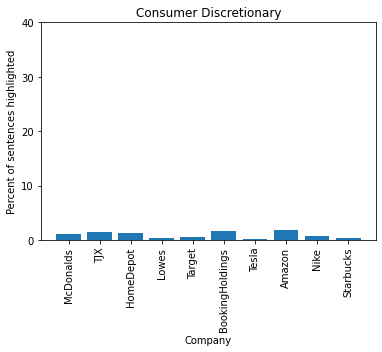

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["McDonalds", "TJX", "HomeDepot", "Lowes", "Target", "BookingHoldings", "Tesla",
     "Amazon", "Nike", "Starbucks"]


i = 0

for file in os.listdir(dir):
    y.append(100 * (rel_sent_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.title("Consumer Discretionary")
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [30]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    10.000000
mean      0.932013
std       0.558378
min       0.206327
25%       0.430992
50%       0.903746
75%       1.339298
max       1.751208
dtype: float64

### Exporting and Saving Files 

In [31]:
# CONDIS_reltext = rel_text_df
# CONDIS_alltext = all_text_final_df
# CONDIS_stat = final_text_stat

# %store CONDIS_reltext
# %store CONDIS_alltext
# %store CONDIS_stat

Stored 'CONDIS_reltext' (DataFrame)
Stored 'CONDIS_alltext' (DataFrame)
Stored 'CONDIS_stat' (DataFrame)
